<a href="https://colab.research.google.com/github/afaizr/Statistika-Optimasi-Python/blob/main/classify_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd "/content/drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


In [ ]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier #1
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression #Belajar juga linear regresion
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier #Belajar juga ini
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from sklearn.datasets import load_iris

In [ ]:
# from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data_cancer.csv')
# df = pd.read_excel("xxx.xls", sheet_name="sheet 1")
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
54,857438,M,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.01030,0.016030,0.009222,0.01095,0.001629,18.10,31.69,117.70,1030.0,0.13890,0.2057,0.27120,0.15300,0.2675,0.07873,NaN
344,89864002,B,11.71,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,0.3446,0.7395,2.355,24.53,0.009536,0.01097,0.016510,0.011210,0.01953,0.003100,13.06,18.16,84.16,516.4,0.14600,0.1115,0.10870,0.07864,0.2765,0.07806,NaN
245,884437,B,10.48,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,0.3719,2.6120,2.517,23.22,0.016040,0.01386,0.018650,0.011330,0.03476,0.003560,11.48,29.46,73.68,402.8,0.15150,0.1026,0.11810,0.06736,0.2883,0.07748,NaN
268,8910506,B,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,0.2345,1.2190,1.546,18.24,0.005518,0.02178,0.025890,0.006330,0.02593,0.002157,13.90,23.64,89.27,597.5,0.12560,0.1808,0.19920,0.05780,0.3604,0.07062,NaN
453,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.01251,0.016150,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.13470,0.1478,0.13730,0.10690,0.2606,0.07810,NaN
444,9110127,M,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,0.2986,0.5906,1.921,35.77,0.004117,0.01560,0.029750,0.009753,0.01295,0.002436,20.38,22.02,133.30,1292.0,0.12630,0.2666,0.42900,0.15350,0.2842,0.08225,NaN
418,906024,B,12.70,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,0.2253,0.6457,1.527,17.37,0.006131,0.01263,0.009075,0.008231,0.01713,0.004414,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464,NaN
217,8811779,B,10.20,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,0.3567,1.9220,2.747,22.79,0.004680,0.03120,0.057740,0.010710,0.02560,0.004613,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809,NaN
137,868682,B,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.01521,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.11900,0.1648,0.13990,0.08476,0.2676,0.06765,NaN
486,913102,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,0.2204,1.0060,1.471,19.98,0.003535,0.01393,0.018000,0.006144,0.01254,0.001219,16.46,25.44,106.00,831.0,0.11420,0.2070,0.24370,0.07828,0.2455,0.06596,NaN


In [ ]:
df.iloc[0:10,[1,2,3,4]]

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10
5,M,12.45,15.70,82.57
6,M,18.25,19.98,119.60
7,M,13.71,20.83,90.20
8,M,13.00,21.82,87.50
9,M,12.46,24.04,83.97


In [ ]:
test_X = df.iloc[0:10,[1,2,3,4]].values
print(test_X.shape)

(10, 4)


In [ ]:
X = df.iloc[:,2:30].values
Y = df.iloc[:,[1]].values

In [ ]:
print(Y)

[['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']

In [ ]:
target_names = df['diagnosis'].unique()
print(target_names)

['M' 'B']


In [ ]:
print(X.shape)
print(Y.shape)

(569, 28)
(569, 1)


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, random_state=2, test_size=0.19)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(460, 28)
(109, 28)
(460, 1)
(109, 1)


In [ ]:
# define the dictionary of models our script can use, where the key
# to the dictionary is the name of the model (supplied via command
# line argument) and the value is the model itself
models = {
	"knn": KNeighborsClassifier(n_neighbors=3),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel="rbf", gamma="auto"),
	"decision_tree": DecisionTreeClassifier(),
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier()
}

In [ ]:
# train the model
print("[INFO] using '{}' model".format("knn"))
model = models["knn"]
model.fit(trainX, trainY)

[INFO] using 'knn' model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(predictions)

[INFO] evaluating...
['B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B'
 'B']


In [ ]:
print(classification_report(testY, predictions,
	target_names=target_names))

              precision    recall  f1-score   support

           M       0.93      0.93      0.93        68
           B       0.88      0.88      0.88        41

    accuracy                           0.91       109
   macro avg       0.90      0.90      0.90       109
weighted avg       0.91      0.91      0.91       109



In [ ]:
# train the model
print("[INFO] using '{}' model".format("naive_bayes"))
model = models["naive_bayes"]
model.fit(trainX, trainY)

[INFO] using 'naive_bayes' model


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.94      0.93      0.93        68
           B       0.88      0.90      0.89        41

    accuracy                           0.92       109
   macro avg       0.91      0.91      0.91       109
weighted avg       0.92      0.92      0.92       109



In [ ]:
# train the model
print("[INFO] using '{}' model".format("logit"))
model = models["logit"]
model.fit(trainX, trainY)

[INFO] using 'logit' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.94      0.94      0.94        68
           B       0.90      0.90      0.90        41

    accuracy                           0.93       109
   macro avg       0.92      0.92      0.92       109
weighted avg       0.93      0.93      0.93       109



In [ ]:
# train the model
print("[INFO] using '{}' model".format("svm"))
model = models["svm"]
model.fit(trainX, trainY)

[INFO] using 'svm' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.62      1.00      0.77        68
           B       0.00      0.00      0.00        41

    accuracy                           0.62       109
   macro avg       0.31      0.50      0.38       109
weighted avg       0.39      0.62      0.48       109



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# train the model
print("[INFO] using '{}' model".format("decision_tree"))
model = models["decision_tree"]
model.fit(trainX, trainY)

[INFO] using 'decision_tree' model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.98      0.91      0.95        68
           B       0.87      0.98      0.92        41

    accuracy                           0.94       109
   macro avg       0.93      0.94      0.93       109
weighted avg       0.94      0.94      0.94       109



In [ ]:
# train the model
print("[INFO] using '{}' model".format("random_forest"))
model = models["random_forest"]
model.fit(trainX, trainY)

[INFO] using 'random_forest' model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.97      0.94      0.96        68
           B       0.91      0.95      0.93        41

    accuracy                           0.94       109
   macro avg       0.94      0.95      0.94       109
weighted avg       0.95      0.94      0.95       109



In [ ]:
# train the model
print("[INFO] using '{}' model".format("mlp"))
model = models["mlp"]
model.fit(trainX, trainY)

[INFO] using 'mlp' model


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.94      0.93      0.93        68
           B       0.88      0.90      0.89        41

    accuracy                           0.92       109
   macro avg       0.91      0.91      0.91       109
weighted avg       0.92      0.92      0.92       109



# **Artificial Neural Network**

In [ ]:
# import the necessary packages
from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
# from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from PIL import Image
# from imutils import paths
# import numpy as np
# import os

In [ ]:
Y

array([['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
      

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(Y)
print(labels)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(X,	np.array(labels), test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(455, 28)
(114, 28)
(455, 1)
(114, 1)


In [ ]:
#model ANN

model = Sequential(
    [
        Dense(32, activation="relu", input_shape=(28,)), #hidden layer 1
        Dense(16, activation="relu"), #hidden layer 2
        Dense(8, activation="relu"),
        Dense(4, activation="relu"),
        Dense(2, activation="relu"),     
        Dense(1, activation = "softmax"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                928       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 3         
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
____________________________________________________

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="binary_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=20)

[INFO] training network...
Epoch 1/20
23/23 [==============================] - 1s 11ms/step - loss: 3.7437 - accuracy: 0.3691 - val_loss: 0.5132 - val_accuracy: 0.4035
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.4077 - val_loss: 0.5211 - val_accuracy: 0.4035
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3477 - accuracy: 0.3532 - val_loss: 0.4170 - val_accuracy: 0.4035
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 0.4101 - val_loss: 0.4033 - val_accuracy: 0.4035
Epoch 5/20
23/23 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.3845 - val_loss: 0.3817 - val_accuracy: 0.4035
Epoch 6/20
23/23 [==============================] - 0s 4ms/step - loss: 0.2377 - accuracy: 0.3439 - val_loss: 0.3792 - val_accuracy: 0.4035
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.2029 - accuracy: 0.3490 - val_loss: 0.2833 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


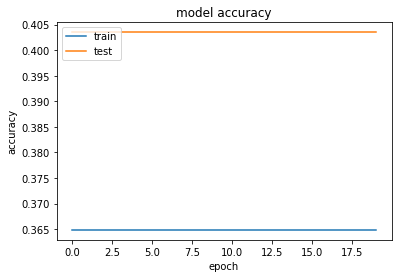

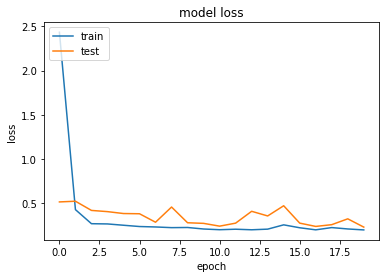

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()